In [1]:
# import packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

%matplotlib inline
url = 'https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv'
df = pd.read_csv(url)

### Part I: Logistic Regression
1. Count the missing data per column, and remove rows with missing data (if any).

In [2]:
# Counting the missing data per column
df.isnull().sum()

age                         13
hypertension                12
heart_disease               21
ever_married                 9
Residence_type              21
avg_glucose_level           31
bmi                        575
stroke                       0
smoking_status_smokes        0
smoking_status_formerly      0
reg_to_vote                 14
dog_owner                   21
raccoons_to_fight           27
fast_food_budget_month       8
income_in_k                 21
er_visits                   15
dtype: int64

In [3]:
# Removing rows with missing data
df = df.dropna()
na = df.isnull().sum()
print(na)
df.head()

age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
stroke                     0
smoking_status_smokes      0
smoking_status_formerly    0
reg_to_vote                0
dog_owner                  0
raccoons_to_fight          0
fast_food_budget_month     0
income_in_k                0
er_visits                  0
dtype: int64


,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0


2. Use 10 fold cross validation for your model validation. Z-score your continuous/interval variables only. Store both the train and test accuracies to check for overfitting.

In [4]:
# all variables in the dataset
predictors = ['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi',
 'smoking_status_smokes', 'smoking_status_formerly', 'reg_to_vote', 'dog_owner', 'raccoons_to_fight', 'fast_food_budget_month', 
 'income_in_k', 'er_visits']

# all continuous/interval variables in the data
contin = ['age', 'avg_glucose_level', 'bmi', 'raccoons_to_fight', 'fast_food_budget_month', 'income_in_k', 'er_visits']

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["stroke"], test_size = 0.2)

X = df[predictors]
y = df["stroke"]

kf = KFold(n_splits = 10)
kf.split(X)

lr = LogisticRegression()

acc_test = []
acc_train = []

for train_indices, test_indices in kf.split(X):
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test  = y.iloc[test_indices]
    
    zscore = StandardScaler()
    zscore.fit(X_train[contin])
    Xz_train = zscore.transform(X_train[contin])
    Xz_test = zscore.transform(X_test[contin])
    
    model = lr.fit(X_train, y_train)
   
    acc_test.append(accuracy_score(y_test, model.predict(X_test)))
    acc_train.append(accuracy_score(y_train, model.predict(X_train)))

print('Train accuracies: ', acc_train)
print('Test accuracies: ', acc_test)




Train accuracies:  [0.9585123837799828, 0.9587467770919603, 0.959453125, 0.956953125, 0.95859375, 0.957890625, 0.95875, 0.958515625, 0.95734375, 0.95875]
Test accuracies:  [0.960646521433591, 0.9458889669711876, 0.9549929676511955, 0.9669479606188467, 0.959915611814346, 0.9620253164556962, 0.9542897327707455, 0.9514767932489452, 0.9669479606188467, 0.9627285513361463]


### Is the model overfit? How can you tell?

Answer here

3. After completing steps 1-2, fit another logistic regression model on ALL of the data (no model validation; but do z score) using the same predictors as before, and put the coefficients into a dataframe called `coef`.

In [5]:
# fit another logistic regression model on ALL of the data (no model validation; but do z score) 
# using the same predictors as before, and put the coefficients into a dataframe called coef.

X = df[predictors]
y = df["stroke"]

X[contin] = zscore.fit_transform(X[contin])


myLogit = LogisticRegression()
myLogit.fit(X, y)

coef = pd.DataFrame({'Coef': myLogit.coef_[0], 'Name': predictors})

print(coef)


        Coef                     Name
0   1.613121                      age
1   0.249543             hypertension
2   0.423396            heart_disease
3  -0.187965             ever_married
4  -0.019790           Residence_type
5   0.242798        avg_glucose_level
6   0.111694                      bmi
7   0.294617    smoking_status_smokes
8   0.145672  smoking_status_formerly
9  -0.059925              reg_to_vote
10  0.015419                dog_owner
11 -0.010345        raccoons_to_fight
12  0.708555   fast_food_budget_month
13  0.126058              income_in_k
14  0.056757                er_visits


4. Print out a confusion matrix for the model you made in part 3.

Text(0.5, 1.0, 'Confusion Matrix')

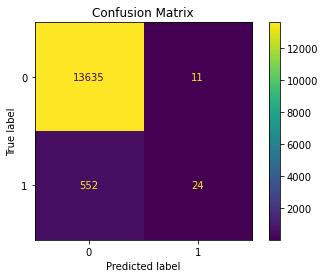

In [6]:
plot_confusion_matrix(myLogit, X, y)
plt.title('Confusion Matrix')

### What does this confusion matrix tell you about your model? How can you tell?

Answer here

### Part II: Data Exploration

### Part II: Q1) In this specific data set, do dog-owners over 50 have a higher average probability of stroke than non-dog owners who currently smoke? How can you tell? (Do not use the model for this question, it's asking you to compare the observed probability of having a stroke in the two groups described).

In [7]:
ageList = []
Over50 = []
Over50TotalDogOwner = []

totalRows = len(df.index)

for i in df['age'] > 50 and df['dog_owner'] == 1:
    ageList.append(i)

for age in ageList:
    if age == True:
        Over50.append(age)

for ppl in Over50:
    for dog in df['dog_owner']:
        Over50TotalDogOwner.append(dog)

print(Over50TotalDogOwner)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Part II: Q2) What is the relationship between average blood glucose and BMI? Is the relationship between those two variables different for people who are and are not registered to vote? How can you tell?

### Part II: Q3) Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 90k? Discuss the potential accuracy and ethical implications if your model were more accurate for different groups (you can use the full model from part I-3 to check accuracy for each of these groups; DO NOT create/fit new models for each income range, use the model from part I-3 to calculate the accuracy for each of these groups.)

### Part II: Q4) Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)? How were you able to tell?

### Part II: Q5) Create a variable er_visits_per_year that calculates the # of visits to the ER that a person has had per year of life. Store this variable in your data frame (no need to include this variable in the previous logistic regression model). Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell?